# TED Talks Data exploration

Not too long ago, I made a half-joking bet with someone that I'd give a TED talk in the next five years. Having yet to make any progress towards that goal, I think exploring the past TED talks and understanding the characteristics of a popular talk is a good place to start. 

## Data

The TED Talks [dataset](https://www.kaggle.com/rounakbanik/ted-talks) contains information on all the audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017.

The data was compiled by Rounak Banik from the official TED website, published on Kaggle, and it contains two files:

 * ted_main.csv - Contains metadata on each talk and speaker. 
 * transcripts.csv - Contains transcript and URL information for TED Talks.

For this study, I'm focusing on the metadata for the talks, and not using the transcripts.

##### The data, ted_main.csv is a flat file where each row is a unique talk, and it contains the following variables for each talk:

Comments - the number of comments from users on the site.  
Description - a brief description of the talk.  
Duration - duration in seconds.  
Event - the event where the talk took place.    
Film date - a Unix timestamp of the film date.   
Languages - the number of languages in which the talk is available.  
Main speaker - the first named speaker of the talk.  
Name - the official name of the talk including speaker and title.  
Number of speakers - the number of speakers in the talk.  
Published date - a Unix timestamp of the date it was published on ted.com.  
Ratings - a dictionary of the various ratings given to the talk by viewers.  
Related talks - a list of dictionaries of recommended talks to watch next.  
Speaker occupation - the occupation of the main speaker.  
Tags - the themes assosciated with the talk.  
Title - the title of the talk.  
Url - the url of the talk.  
Views - the number of views.


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
palette = ['#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695']
sns.set_palette(palette)

### Let's read in the data and take a look at it

In [3]:
ted = pd.read_csv("ted_main.csv")

In [4]:
ted.shape

(2550, 17)

The data has 2550 observations and the 17 previously described columns.  
### Let's see what the head looks like

In [5]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


Looking at the output of the describe method, you can see that for comments, duration, and views, the max values are much higher than the means. Getting a real picture of the data through summary statistics might be difficult due to the extreme values.  

### Let's take a look at some of the variables

As stated above, comments is a column of integers that shows the number of comments each talk received. Let's see what the distribution of the variable it.

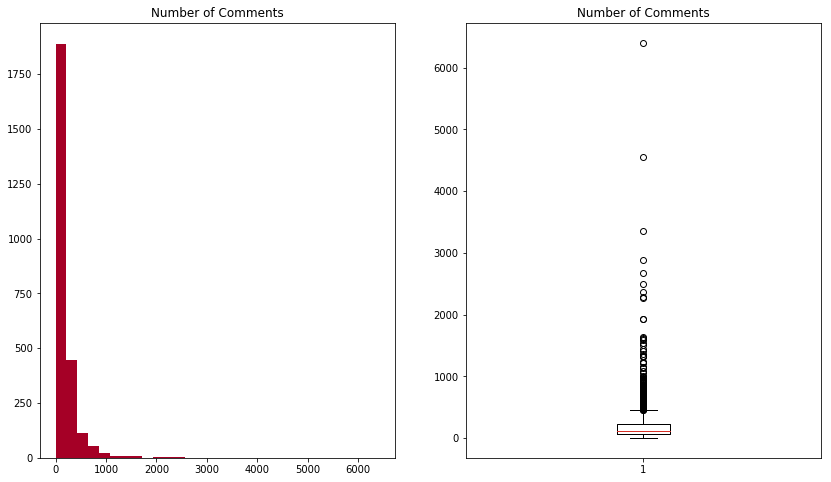

In [6]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['comments'], bins=30)
plt.title('Number of Comments')

plt.subplot(1, 2, 2)
plt.boxplot(ted['comments'])
plt.title('Number of Comments')

plt.show()

Uh oh, due to the extreme outliers, these plots are not very helpful. Let's see what it looks like with the upper quartile removed.

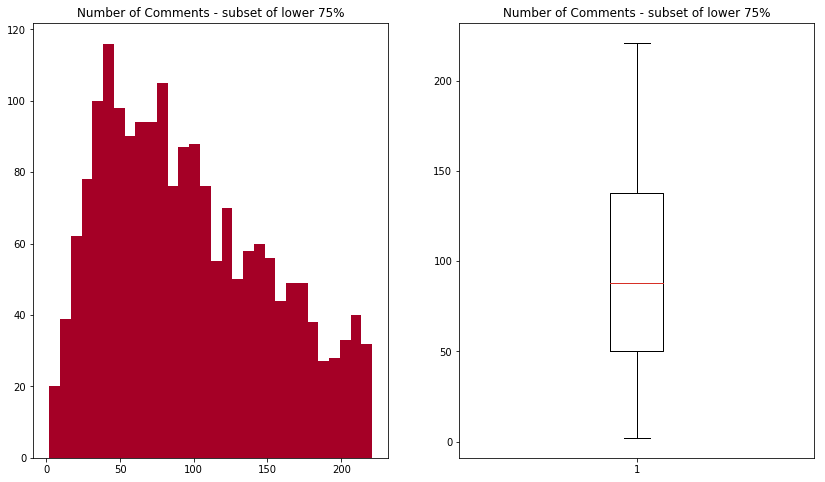

In [7]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['comments'][ted['comments'] < 221.75], bins=30)
plt.title('Number of Comments - subset of lower 75%')

plt.subplot(1, 2, 2)
plt.boxplot(ted['comments'][ted['comments'] < 221.75].reset_index(drop=True))
plt.title('Number of Comments - subset of lower 75%')

plt.show()

That's better! The plots are a lot more visually informative without the extreme values at the top.  

Duration is a column that represents the length of the talk in seconds. Let's look at the the distribution of duration.

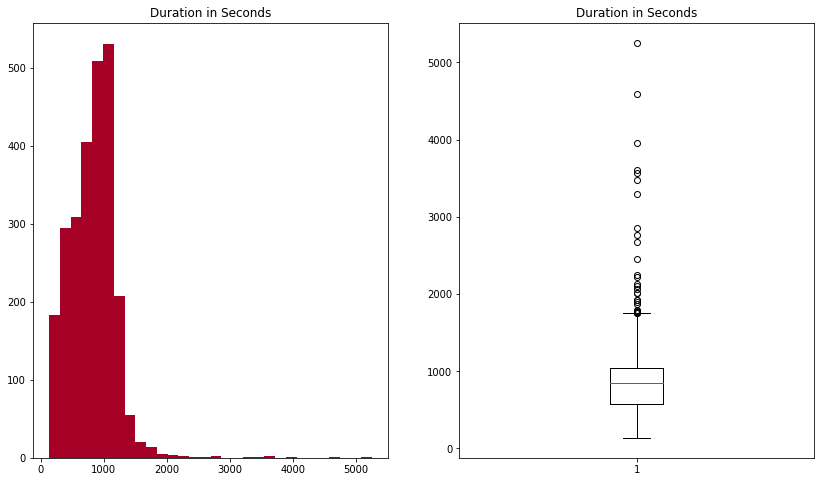

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['duration'], bins=30)
plt.title('Duration in Seconds')

plt.subplot(1, 2, 2)
plt.boxplot(ted['duration'])
plt.title('Duration in Seconds')

plt.show()

Interestingly, some talks lasted way longer than the rest.  
Let's also see what the distribution looks like for talks that lasted less than 2000 seconds.

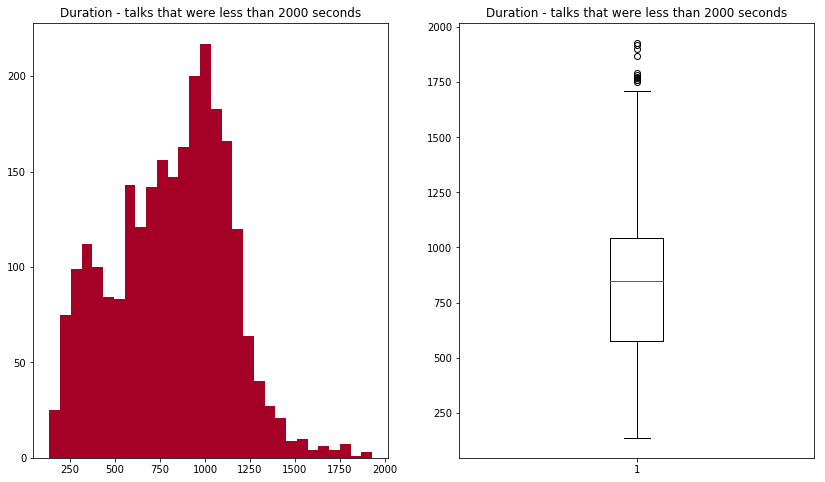

In [11]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['duration'][ted['duration'] < 2000], bins=30)
plt.title('Duration - talks that were less than 2000 seconds')

plt.subplot(1, 2, 2)
plt.boxplot(ted['duration'][ted['duration'] < 2000])
plt.title('Duration - talks that were less than 2000 seconds')

plt.show()

Without the extreme values, it's easier to get a visual idea of the duration of the talks. It looks like most talks were around 1000 seconds.  

Now let's check out the number of views each talk has received.

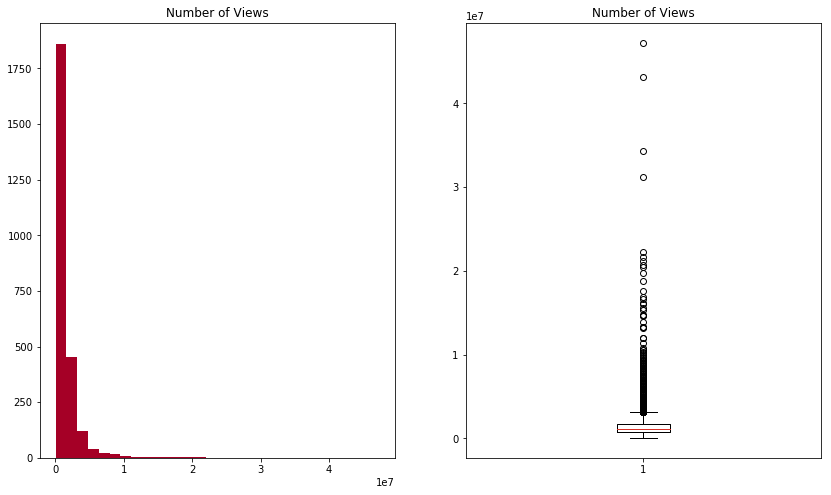

In [12]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['views'], bins=30)
plt.title('Number of Views')

plt.subplot(1, 2, 2)
plt.boxplot(ted['views'])
plt.title('Number of Views')

plt.show()

The distribution of the views looks very similar to that of the comments, due to some extreme outliers. Let's see what it looks like when we remove the upper quartile.

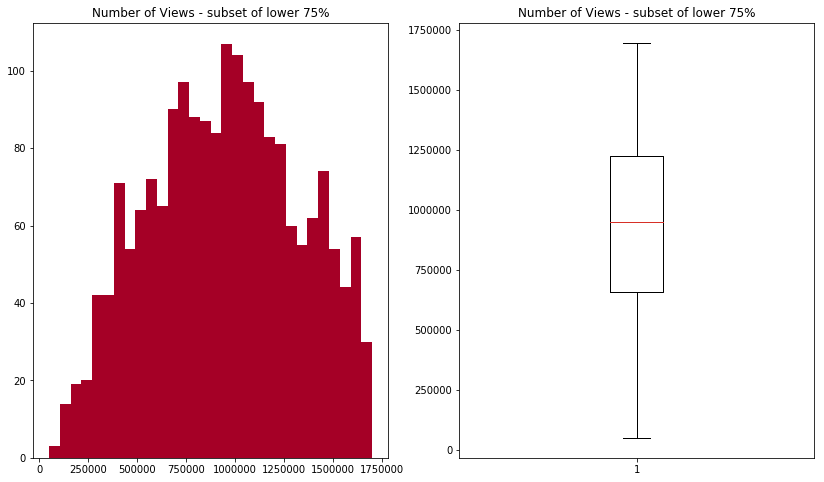

In [13]:
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.hist(ted['views'][ted['views'] < 1.700760e+06], bins=30)
plt.title('Number of Views - subset of lower 75%')

plt.subplot(1, 2, 2)
plt.boxplot(ted['views'][ted['views'] < 1.700760e+06].reset_index(drop=True))
plt.title('Number of Views - subset of lower 75%')

plt.show()

After removing the upper quartile, once again, it's easier to get an idea of how the variable is distributed. 

# Analytic Questions

### 1. What are the most common topics for TED Talks, and are they more popular than average?
If someone is going to give a TED Talk, having a topic sounds like a good idea. Now that we understand how some of the numeric variables are distributed, let's take a look at the tags column to see what types of topics are being talked about.  

The tags column is a stringifies list of the themes assosciated with the talk. To help us get an idea of what to talk about, let's see what the most common tags are.

In [14]:
import ast
from collections import Counter
import operator

tags = ted['tags']
all_tags = []
for tag in tags:
    tag_list = ast.literal_eval(tag)
    all_tags += tag_list

tags_count = Counter(all_tags)
sorted_tags = sorted(tags_count.items(), key=operator.itemgetter(1), reverse=True)

print(len(sorted_tags))


416


There are 416 unique tags that are assosciated with the different talks. Lets take a look at the most common themes.

In [12]:
sorted_tags[:20] 

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229),
 ('society', 224),
 ('art', 221),
 ('social change', 218),
 ('future', 195),
 ('communication', 191),
 ('creativity', 189),
 ('biology', 189),
 ('humanity', 182),
 ('collaboration', 174),
 ('environment', 165)]

Here we have a list of the top 20 most common tags. You can see that technology is the most common tag, which is not surprising considering that TED was originally a tech conference that gradually expanded into other areas. Looking at the list of the top 20 tags, you can get a feeling for the types of talks that get selected.  

Now let's see what the most uncommon themes have been over the years.

In [13]:
sorted_tags[-20:]

[('microsoft', 3),
 ('Moon', 3),
 ('mining', 3),
 ('novel', 3),
 ('Brand', 3),
 ('Nobel prize', 3),
 ('3d printing', 3),
 ('forensics', 3),
 ('pandemic', 3),
 ('street art', 3),
 ('blockchain', 3),
 ('epidemiology', 3),
 ('origami', 2),
 ('evil', 2),
 ('augmented reality', 2),
 ('grammar', 2),
 ('skateboarding', 1),
 ('testing', 1),
 ('cloud', 1),
 ('funny', 1)]

Here we can see that some of the most uncommon tags are skateboarding, testing, cloud, and funny.  

Do the most common topics get more views than the average talk? It would make sense that popular topics are selected more frequently. Let's take a look.

First we'll make a list of the top 10 most common tags, and then create a column for each one.

In [15]:
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x))

In [15]:
def find_tag(x, tag):
    if tag in x:
        return 1
    else:
        return 0

In [16]:
top_tag_list = [x[0] for x in sorted_tags[:10]]

for tag in top_tag_list:
    ted[tag] = ted['tags'].apply(lambda x: find_tag(x, tag))

In [17]:
ted[top_tag_list].head()

,technology,science,global issues,culture,TEDx,design,business,entertainment,health,innovation
0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0


In [18]:
average_views = []

for tag in top_tag_list:
    average_views.append(ted['views'][ted[tag] == 1].mean())
#add the overall view average    
average_views.append(ted['views'].mean())
top_tag_with_overall_avg = top_tag_list + ['overall average']

top_tags_views = pd.DataFrame(
    {'Top Tag': top_tag_with_overall_avg,
     'Average Views': average_views,
     })

In [19]:
top_tags_views

,Average Views,Top Tag
0,1.447328e+06,technology
1,1.579162e+06,science
2,1.264089e+06,global issues
3,2.302286e+06,culture
4,1.573030e+06,TEDx
5,1.346319e+06,design
6,2.117581e+06,business
7,1.931166e+06,entertainment
8,1.668310e+06,health
9,1.424937e+06,innovation


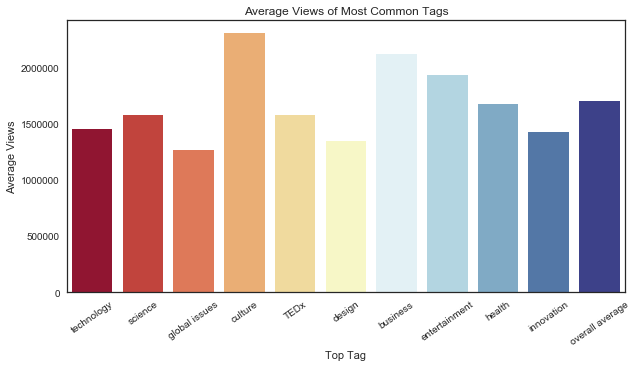

In [25]:



plt.figure(figsize=(10,5))
sns.barplot(x="Top Tag", y="Average Views", data=top_tags_views)
plt.xticks(rotation=35)
plt.title('Average Views of Most Common Tags')

plt.show()

### 2. Which ratings have the most views?
The ratings column is a dictionary of 14 possible ratings that viewers can select for each talk. They are:
* Informative 
* Confusing 
* Jaw-dropping 
* Ingenious 
* Persuasive 
* Inspiring 
* Longwinded 
* Unconvincing 
* Fascinating 
* OK 
* Beautiful 
* Courageous 
* Funny 
* Obnoxious  

Let's take a look at how viewers have rated the talks, and how that relates to number of views:

In [ ]:
possible_ratings = ["Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"]

ted['ratings'] = ted['ratings'].apply(ast.literal_eval)

In [ ]:
def get_rating_count(x, rating):
    for i in x:
        if i['name'] == rating:
            return i['count']

In [ ]:
for index, item in enumerate(possible_ratings):
    ted[item] = ted['ratings'].apply(lambda x: get_rating_count(x, item))

In [ ]:
ted[possible_ratings].head()

In [ ]:
ratings = ted[["Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"]]

In [ ]:
ratings.describe()

In [ ]:
ratings.sum()

In [ ]:
ted['total_ratings'] = ratings.sum(axis=1)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(ted['total_ratings'], ted['views'])

plt.show()

In [ ]:
for rating in possible_ratings:
    ted[rating + "_percent"] = ted[rating] / ted['total_ratings']

In [ ]:
percent_columns = []
for rating in possible_ratings:
    percent_columns += [rating + "_percent"]

percentages = ted[percent_columns]

plt.figure(figsize=(12,10))
plt.boxplot(percentages.values, widths=0.5)
plt.title('Distribution of Rating Percentages')
plt.xticks(np.arange(15), ("", "Informative", "Confusing", "Jaw-dropping", "Ingenious", "Persuasive", "Inspiring", "Longwinded", "Unconvincing", "Fascinating", "OK", "Beautiful", "Courageous", "Funny", "Obnoxious"), rotation=50, ha='center')

plt.show()

In [ ]:
plt.figure(figsize=(16,16))

for index, column in enumerate(percent_columns):
    plt.subplot(4, 4, index + 1)   
    plt.scatter(ted[column], ted['views'])
    plt.title(column + " vs. Views", x=.59)
    
plt.show()

### 3. What is the correlation between publish date and total views?

Do talks that have been on the site longer have more views?

In [ ]:
import datetime

In [ ]:

ted['published_date_datetime'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [ ]:
ted['year_published'] = ted['published_date_datetime'].apply(lambda x: x.split('-')[0])

In [ ]:
yearly_talks = pd.DataFrame(ted['year_published'].value_counts().reset_index())

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x='index', y='year_published', data=yearly_talks)
plt.title('Yearly Number of Talks')
plt.ylabel('Talks')
plt.xlabel('Year')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.scatter(ted['published_date'], ted['views'])

plt.subplot(1, 2, 2)
plt.scatter(ted['published_date'][ted['views'] < 1.700760e+06], ted['views'][ted['views'] < 1.700760e+06])

plt.show()

In [ ]:
ted[['published_date', 'views']][ted['views'] < 1.700760e+06].corr()

In [ ]:
yearly_views = pd.DataFrame(ted.groupby('year_published')['views'].mean().reset_index())

In [ ]:
yearly_views_subset = pd.DataFrame(ted[ted['views'] < 1.700760e+06].groupby('year_published')['views'].mean().reset_index())

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.pointplot(x='year_published', y='views', data=yearly_views)
plt.title('Mean Number of Views')
plt.ylabel('Views')
plt.xlabel('Year')

plt.subplot(2, 1, 2)
sns.pointplot(x='year_published', y='views', data=yearly_views_subset)
plt.title('Mean Number of Views, Subset of lower 75%')
plt.ylabel('Views')
plt.xlabel('Year')

plt.show()

possible analytic questions: 
What are the most common topics (tags), and what topics recieve the most views?

Which ratings have the most total views? 

Is there a correlation between publish date and total views? Do older talks have more views because they've been on the site longer or do newer talks have more views as a result of the fan base growing over time. 

Which Ted events have been the most popular, least popular in terms of views?



Possible ratings, User is asked to select up to 3, if only one is chosen it will count 3 times:

Informative    Confusing  Jaw-dropping    Ingenious  Persuasive    Inspiring  Longwinded    Unconvincing  Fascinating    OK  Beautiful    Courageous  Funny    Obnoxious

Future research ideas:

build a recommendation tool to suggest what talks the viewer would like.
Predict how many views a talk will get.
